In [105]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv(r"C:\Users\VISHAL S PANCHANGE\Downloads\Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [107]:
df.shape

(5223, 8)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [109]:
# Step 1: Create a summary DataFrame with data types
df_sum = pd.DataFrame(df.dtypes, columns=['Datatype'])

# Step 2: Calculate missing values per column (not mean)
df_sum['missing_value'] = df.isna().sum()

# Step 3: Add the number of unique values per column
df_sum['unique'] = df.nunique().values

# Step 4: Check for duplicate rows (this will modify the original DataFrame, not the summary)
df_sum['dup'] = df.duplicated()

# Step 5: Get descriptive statistics for all columns and transpose for readability
des = pd.DataFrame(df.describe(include='all')).transpose()

# Step 6: Combine `df_sum` with descriptive statistics into a new DataFrame
df_summary = pd.concat([df_sum, des], axis=1)

# Show the resulting summary DataFrame
df_summary


,Datatype,missing_value,unique,dup,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,object,0,5223,NaN,5223,5223,14/03/2006,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rainfall_Bastia_Umbra,float64,1024,223,NaN,4199.0,NaN,NaN,NaN,1.556633,5.217923,0.0,0.0,0.0,0.1,67.3
Depth_to_Groundwater_P24,float64,55,1306,NaN,5168.0,NaN,NaN,NaN,-26.263723,3.319858,-34.47,-28.25,-25.99,-23.82,-19.66
Depth_to_Groundwater_P25,float64,39,1298,NaN,5184.0,NaN,NaN,NaN,-25.692926,3.214165,-33.71,-27.62,-25.54,-23.43,-19.1
Temperature_Bastia_Umbra,float64,1024,336,NaN,4199.0,NaN,NaN,NaN,15.030293,7.794871,-3.7,8.8,14.7,21.4,33.0
Temperature_Petrignano,float64,1024,320,NaN,4199.0,NaN,NaN,NaN,13.739081,7.701369,-4.2,7.7,13.5,20.0,31.1
Volume_C10_Petrignano,float64,198,4324,NaN,5025.0,NaN,NaN,NaN,-29043.296726,4751.864371,-45544.896,-31678.56,-28689.12,-26218.08,0.0
Hydrometry_Fiume_Chiascio_Petrignano,float64,1024,25,NaN,4199.0,NaN,NaN,NaN,2.372517,0.589088,0.0,2.1,2.4,2.7,4.1


In [110]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [111]:
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)
df.columns = ['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume', 'Hydrometry']

In [112]:
df.head()

,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,14/03/2006,NaN,-22.18,NaN,NaN,NaN
1,15/03/2006,NaN,-22.14,NaN,NaN,NaN
2,16/03/2006,NaN,-22.04,NaN,NaN,NaN
3,17/03/2006,NaN,-22.04,NaN,NaN,NaN
4,18/03/2006,NaN,-22.04,NaN,NaN,NaN


In [113]:
data = df[df['Rainfall'].notnull()].reset_index(drop =True)
data['Date'] = pd.to_datetime(data['Date'])


In [114]:
data

,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-02-01,0.0,-31.11,2.3,-28785.888,2.5
2,2009-03-01,0.0,-31.07,4.4,-25766.208,2.4
3,2009-04-01,0.0,-31.05,0.8,-27919.296,2.4
4,2009-05-01,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4


In [115]:
data.isna().sum()

Date                     0
Rainfall                 0
Depth_to_groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64

In [116]:
data[data.duplicated()]

,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry


In [117]:
data['Volume'] = data['Volume'].interpolate()
data['Hydrometry'] = data['Hydrometry'].interpolate()
data['Depth_to_groundwater'] = data['Depth_to_groundwater'].interpolate()

In [118]:
data_col = data.columns
data_col

Index(['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume',
       'Hydrometry'],
      dtype='object')

There are several methods for handling missing data:

Fill NaN with fixed value: Replacing Nan values with a fixed value ex. zero or np.inf

Fill NaN with mean or median: Replacing Nan value with mean or median of the column

Fill NaN using ffill method: Ffill method replaces the Nan value with last value

Fill NaN with interploated value: Interpolation can be linear, polynomial, nearest, etc. In linear interplotation values are equally spaced. Nan is filled considering the previous and next index value of the Nan.

We are using interploation here as it is the best option.

In [119]:
for i in data_col:
    data[i] = data[i].fillna(data[i].mean())

In [120]:
data.isna().sum()

Date                    0
Rainfall                0
Depth_to_groundwater    0
Temperature             0
Volume                  0
Hydrometry              0
dtype: int64

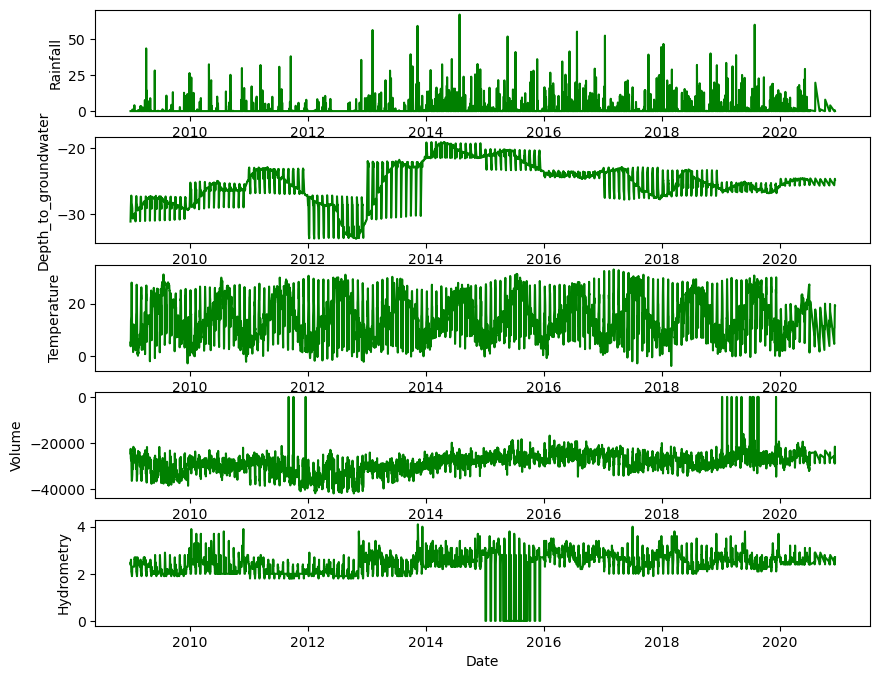

In [121]:
fig,axs = plt.subplots(nrows =len(data.drop(columns = ['Date']).columns), ncols=1, figsize=(10,8))
for j,i in enumerate(data.drop(columns = ['Date']).columns):
    sns.lineplot(x=data['Date'], y=data[i], data = data, ax=axs[j], color = 'green')

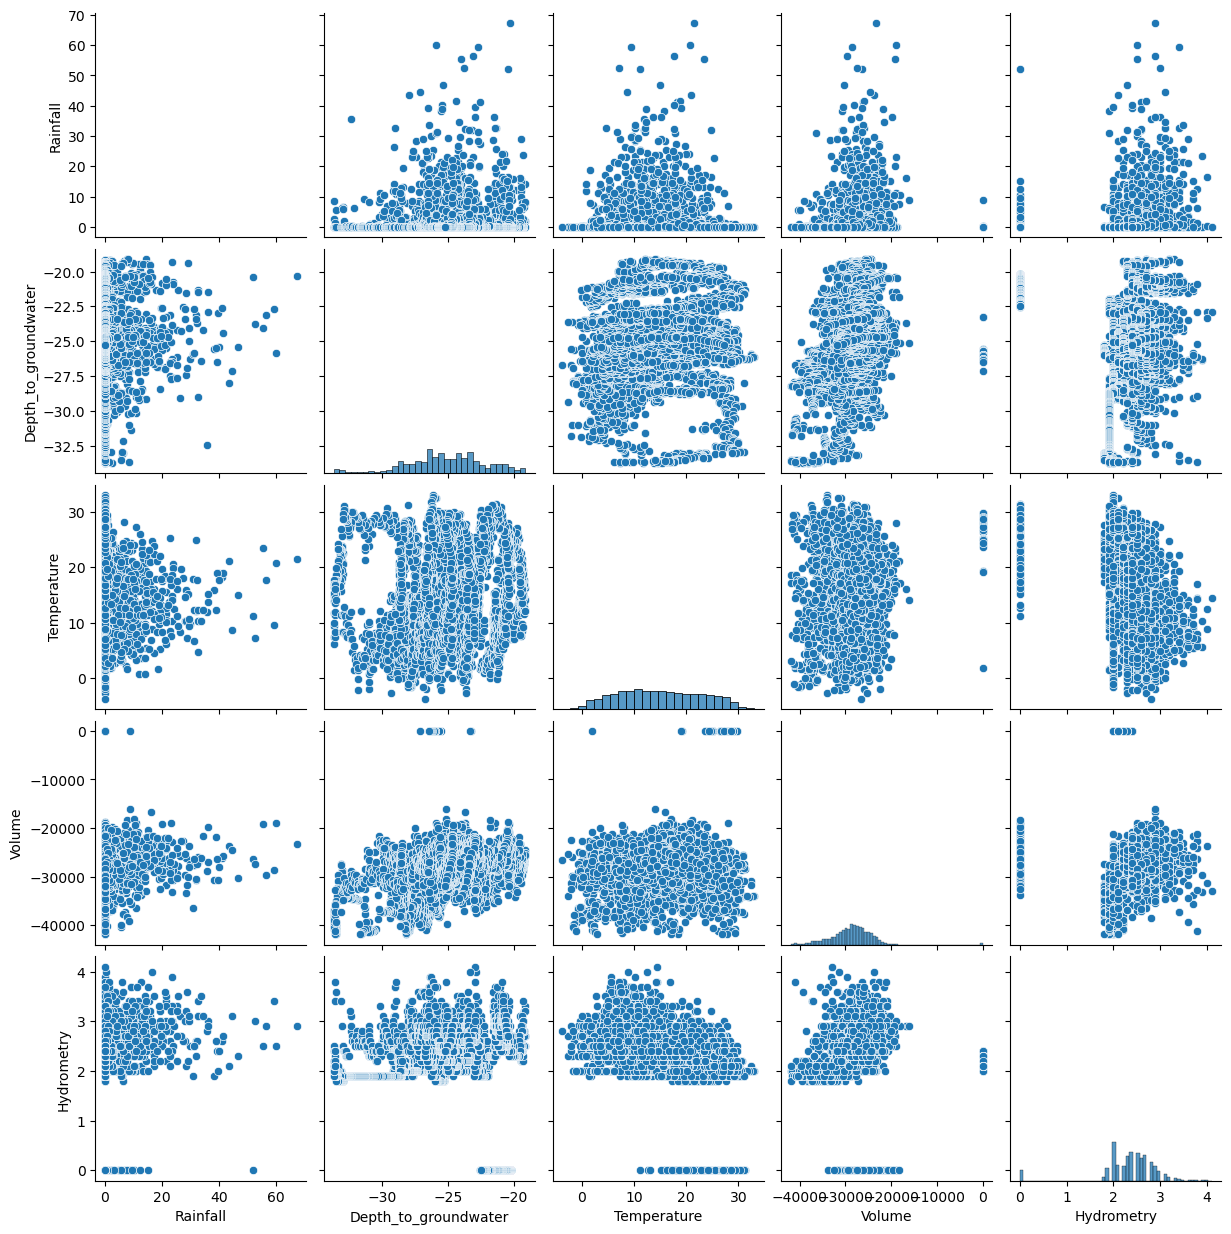

In [122]:
sns.pairplot(data)

<AxesSubplot:>

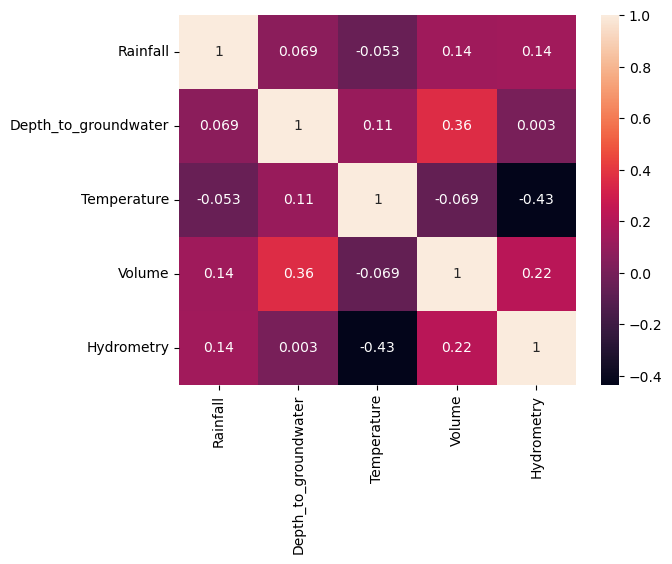

In [123]:
sns.heatmap(data.corr(), annot= True, )

Data Preprocessing
Timestamp of Time series should be in order

It can be in chronological order where dates are sorted in sequential manner and equidistant timestamps where dates occur at regular intervals. Further, if dates are in neither of above formats then some re-sampling is required

In [124]:
data[(data['Volume']==0)].count()

Date                    25
Rainfall                25
Depth_to_groundwater    25
Temperature             25
Volume                  25
Hydrometry              25
dtype: int64

In [125]:
data['Volume'] = data['Volume'].replace(0,np.nan)
data['Hydrometry'] = data['Hydrometry'].replace(0, np.nan)

Smoothing data or Resampling
Smoothing or resampling in time series data involves adjusting the data frequency. It can be done by

Upsampling: when the frequency of samples is increased (e.g. days to hours)
Downsampling: when the frequency of samples is decreased (e.g. days to weeks)
Resampling for Irregular data: converts irregular data to regular intervals
Rolling statistics: Instead of computing a single statistic over an entire set of data, we compute a rolling statistic against a subset or window of that data, and we adjust the window with each new data point we encounter (e.g. a window to 10 days, calculate mean, keep sliding window and form a curve)
Moving averagees: smooth data by averaging values in a sliding window
Exponential smoothning: assigns exponentially decreasing weights to older data
Decomposition and Trend analysis: split data into trend, seasonality, and residuals for better modeling
Here in our data we will be using downsampling to smoothen our data.

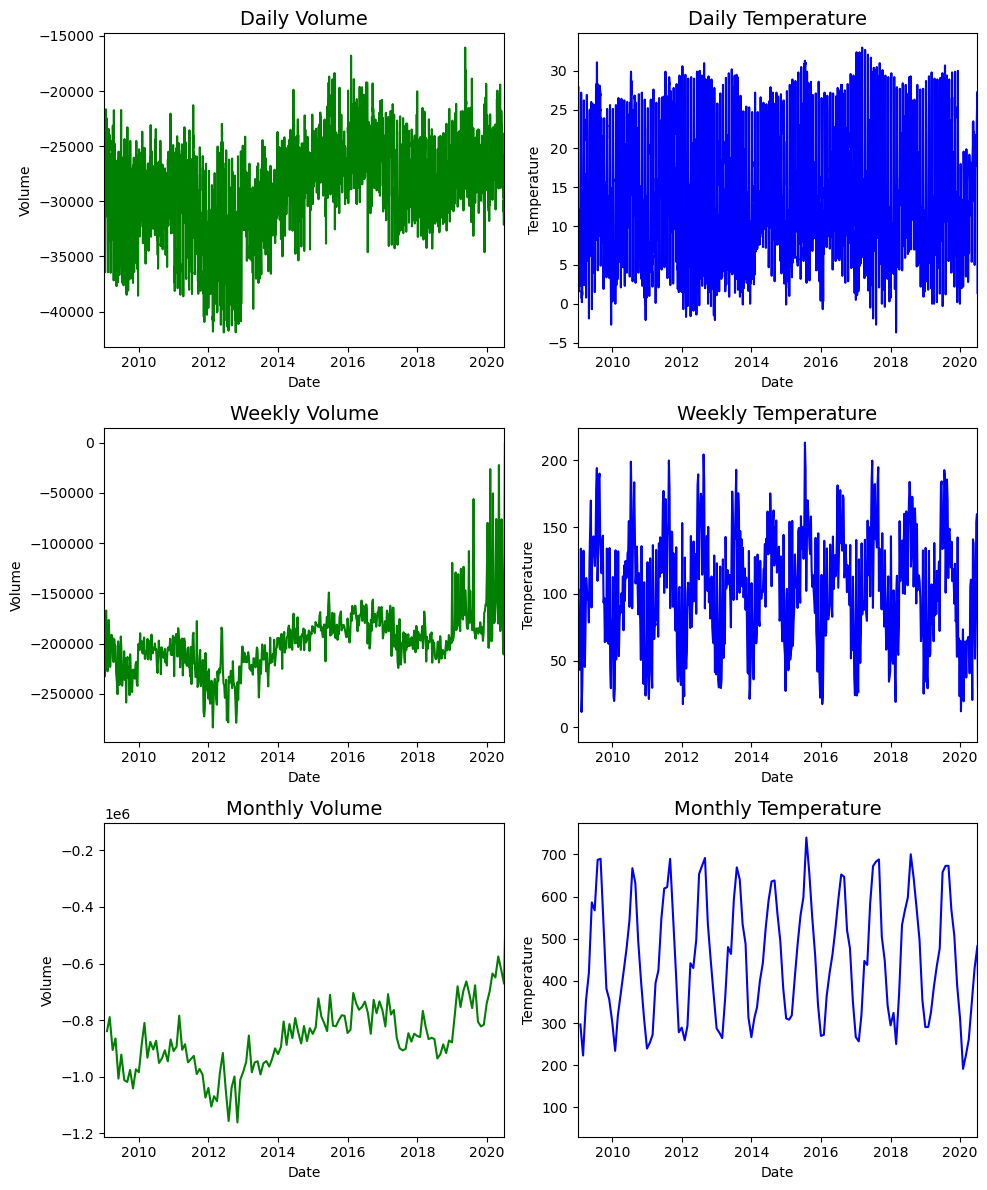

In [126]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# First plot: Daily Volume
sns.lineplot(x=data['Date'], y=data['Volume'], ax=ax[0, 0], color='green')
ax[0, 0].set_title('Daily Volume', fontsize=14)

# Weekly resampled Volume
resample_7week = data[['Date', 'Volume']].resample('7D', on='Date').sum().reset_index()
sns.lineplot(x=resample_7week['Date'], y=resample_7week['Volume'], ax=ax[1, 0], color='green')
ax[1, 0].set_title('Weekly Volume', fontsize=14)

# Monthly resampled Volume
resample_7month = data[['Date', 'Volume']].resample('M', on='Date').sum().reset_index()
sns.lineplot(x=resample_7month['Date'], y=resample_7month['Volume'], ax=ax[2, 0], color='green')
ax[2, 0].set_title('Monthly Volume', fontsize=14)

# Adjust x-limits for Volume plots
for i in range(3):
    ax[i, 0].set_xlim([pd.to_datetime('2009-01-01'), pd.to_datetime('2020-06-30')])

# First plot for Temperature
sns.lineplot(x=data['Date'], y=data['Temperature'], ax=ax[0, 1], color='blue')
ax[0, 1].set_title('Daily Temperature', fontsize=14)

# Weekly resampled Temperature
resample_7week_temp = data[['Date', 'Temperature']].resample('7D', on='Date').sum().reset_index()
sns.lineplot(x=resample_7week_temp['Date'], y=resample_7week_temp['Temperature'], ax=ax[1, 1], color='blue')
ax[1, 1].set_title('Weekly Temperature', fontsize=14)

# Monthly resampled Temperature
resample_7month_temp = data[['Date', 'Temperature']].resample('M', on='Date').sum().reset_index()
sns.lineplot(x=resample_7month_temp['Date'], y=resample_7month_temp['Temperature'], ax=ax[2, 1], color='blue')
ax[2, 1].set_title('Monthly Temperature', fontsize=14)

# Adjust x-limits for Temperature plots
for i in range(3):
    ax[i, 1].set_xlim([pd.to_datetime('2009-01-01'), pd.to_datetime('2020-06-30')])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [127]:
data.columns

Index(['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume',
       'Hydrometry'],
      dtype='object')

In [128]:
data1 = data.resample('7D', on = 'Date').sum().reset_index()
data1

,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-199.92,82.7,-184072.608,16.4
1,2009-01-08,1.1,-204.63,103.7,-232432.416,14.8
2,2009-01-15,0.2,-212.94,52.7,-178242.336,16.1
3,2009-01-22,4.1,-210.13,43.5,-166980.960,17.5
4,2009-01-29,0.0,-207.49,43.0,-188299.296,17.6
...,...,...,...,...,...,...
618,2020-11-05,4.0,-49.43,37.0,-50984.640,5.2
619,2020-11-12,0.0,0.00,0.0,0.000,0.0
620,2020-11-19,0.0,0.00,0.0,0.000,0.0
621,2020-11-26,0.0,-50.91,15.2,-53820.288,4.9


Stationarity

Some time-series models like ARIMA, assume that data is stationary. Stationarity describes that data has:

constant mean and mean is not time-dependent
constant variance and variance is not time-dependent
constant covariance and covariance is not time-dependent
Three ways to check stationary:

Visual: plot time series and check trends for stationarity
Basic Statistics: split time series and compare the mean and variance of each partition
Statistical test: Augmented Dickey Fuller tes

Text(0, 0.5, 'Hydrometry')

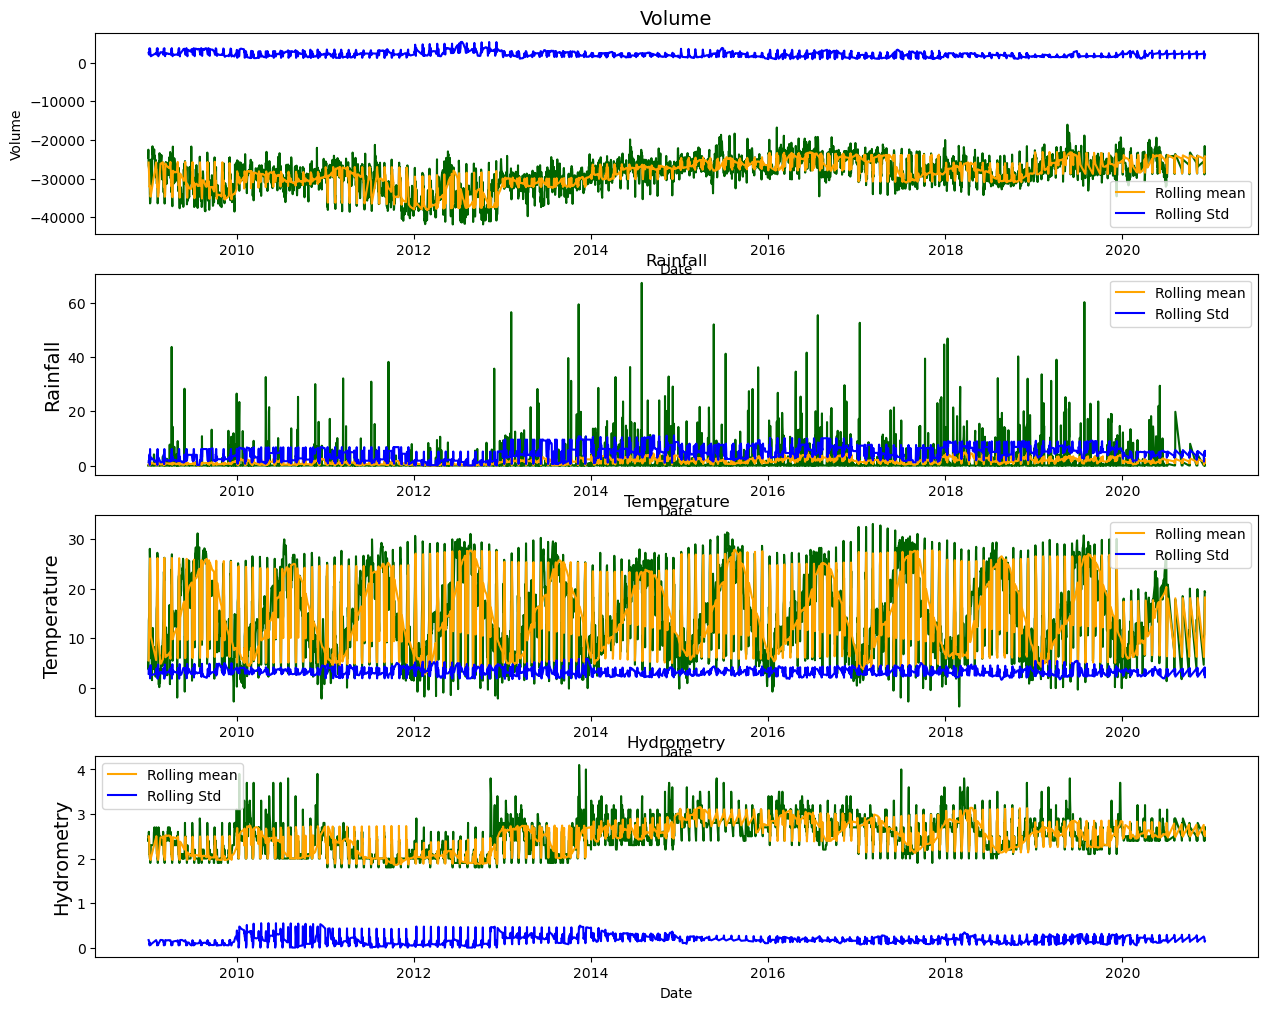

In [129]:
rolling_window = 52
#Volume
fig, axs = plt.subplots(nrows = 4, ncols = 1, figsize = (15,12))
sns.lineplot(x = data['Date'], y = data['Volume'], ax=axs[0], color= 'darkgreen')
sns.lineplot(x = data['Date'], y = data['Volume'].rolling(rolling_window).mean(), ax=axs[0], color = 'orange', label = 'Rolling mean')
sns.lineplot(x = data['Date'], y= data['Volume'].rolling(rolling_window).std(), ax = axs[0], color = 'blue', label = 'Rolling Std')

axs[0].set_title('Volume', fontsize = 14)
axs[0].set_ylabel('Volume')

#Rainfall

sns.lineplot(x = data['Date'], y = data['Rainfall'], ax=axs[1], color= 'darkgreen')
sns.lineplot(x = data['Date'], y = data['Rainfall'].rolling(rolling_window).mean(), ax=axs[1], color = 'orange', label = 'Rolling mean')
sns.lineplot(x = data['Date'], y= data['Rainfall'].rolling(rolling_window).std(), ax = axs[1], color = 'blue', label = 'Rolling Std')

axs[1].set_title('Rainfall')
axs[1].set_ylabel('Rainfall', fontsize = 14)

#Temperature
sns.lineplot(x = data['Date'], y = data['Temperature'], ax=axs[2], color= 'darkgreen')
sns.lineplot(x = data['Date'], y = data['Temperature'].rolling(rolling_window).mean(), ax=axs[2], color = 'orange', label = 'Rolling mean')
sns.lineplot(x = data['Date'], y= data['Temperature'].rolling(rolling_window).std(), ax = axs[2], color = 'blue', label = 'Rolling Std')

axs[2].set_title('Temperature')
axs[2].set_ylabel('Temperature', fontsize = 14)

#Hydrometry

sns.lineplot(x = data['Date'], y = data['Hydrometry'], ax=axs[3], color= 'darkgreen')
sns.lineplot(x = data['Date'], y = data['Hydrometry'].rolling(rolling_window).mean(), ax=axs[3], color = 'orange', label = 'Rolling mean')
sns.lineplot(x = data['Date'], y= data['Hydrometry'].rolling(rolling_window).std(), ax = axs[3], color = 'blue', label = 'Rolling Std')

axs[3].set_title('Hydrometry')
axs[3].set_ylabel('Hydrometry', fontsize = 14)

As it can be seen, though mean is not stationary but it seems to be close to stationarity. Hence, we will check stationarity using statistical test ADF.

Augmented Dickey Fuller(ADF): It is a type to statistical test called unit root test. Unit roots are cause of non-stationarity.

Unit Root Test: A unit root test attempts to determine whether a given time series is consistent with a unit root process. Technically , a unit root is said to exist in a time series of value of alpha =1 in below equation. yt = yt–1 + stationary process

where Yt is value of the time series at time ‘t’ and Xe is an exogenous variable (i.e. one whose measure is determined outside the model and is imposed on the model).

The presence of a unit root means the time series is non-stationary.

Null Hypothesis: Time series has a unit root.(Time series is not stationary)
Alternate Hypothesis: Time series has no unit root.(Time series is stationary)
If null hypothesis is rejected then time series is stationary

Let default significance level and critical value be 5%. Ways of rejecting null hypothesis:

p-value > significance level (default: 0.05): Fail to reject null hypothesis
p-value <= significance level (default: 0.05): Reject null hypothesis

ADF statistic > critical value: Fail to reject null hypothesis

ADF statistic <= critical value: Reject null hypothesis

In [130]:
from statsmodels.tsa.stattools import adfuller

In [131]:
data = data.fillna(method = 'ffill')

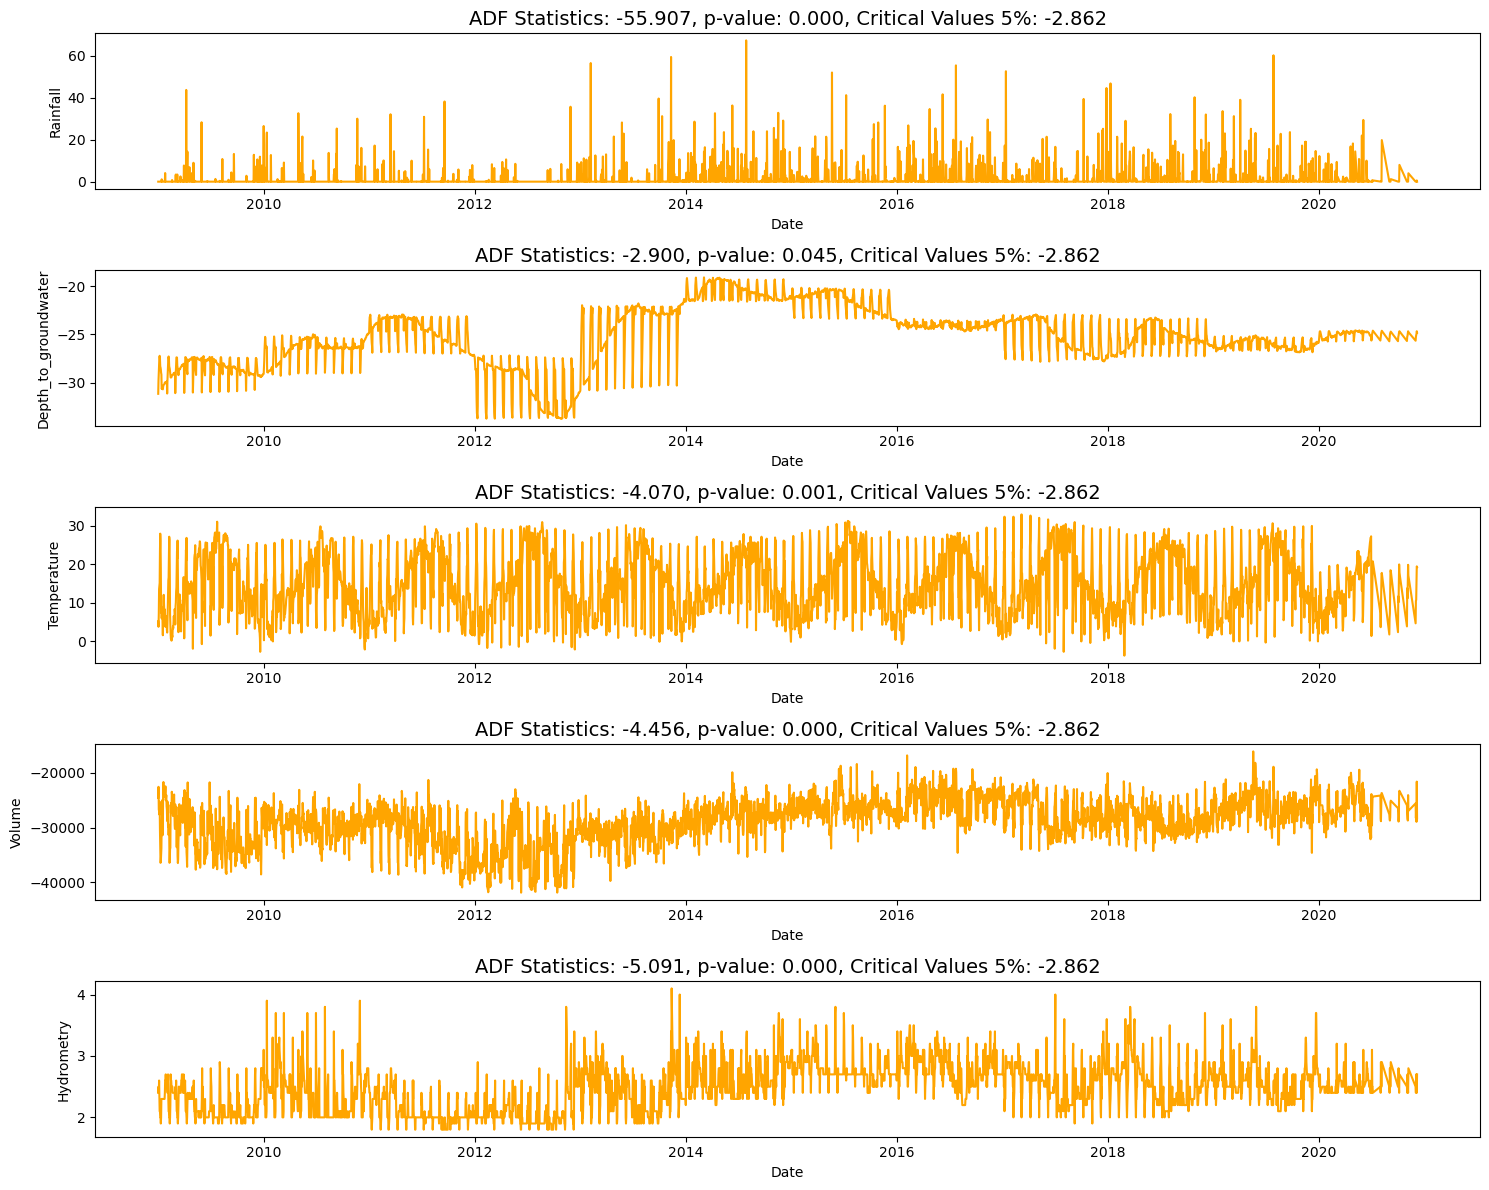

In [132]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))

def adk_test(series, title, ax):      

    # Perform the ADF test
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_value = result[1]
    critical_value_5 = result[4]['5%']
    
    # Set the line color based on test results
    if (p_value < significance_level) and (adf_stat < critical_value_5):
        line_color = 'orange'
    else:
        line_color = 'green'
    
    # Plot the series
    sns.lineplot(x=data['Date'], y=series, ax=ax, color=line_color)
    
    # Set the title with test results
    ax.set_title(f'ADF Statistics: {adf_stat:0.3f}, p-value: {p_value:0.3f}, Critical Values 5%: {critical_value_5:0.3f}', fontsize=14)
    ax.set_ylabel(title)

# Apply the ADF test and plotting to each series
for i, col in enumerate(data.drop(columns='Date').columns):
    adk_test(data[col], col, axs[i])

plt.tight_layout()
plt.show()


Time Series Decomposition

Timeseries decomposition involves thinking of a series as a combination of level, trend, seasonality and noise components.

Level: average value in the series
Trend: increasing or decreasing value of series
Seasonality: repeating short term cycle in series
Noise: random variation in series
All series have level and noise. The trend and seasonality components are optional.

Components can combine either additively or multiplicatively:

Additive: y(t) = Level + Trend + Seasonality + Noise
Multiplicative: y(t) = Level Trend Seasonality * Noise

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [134]:
data = data.fillna(method = 'ffill')

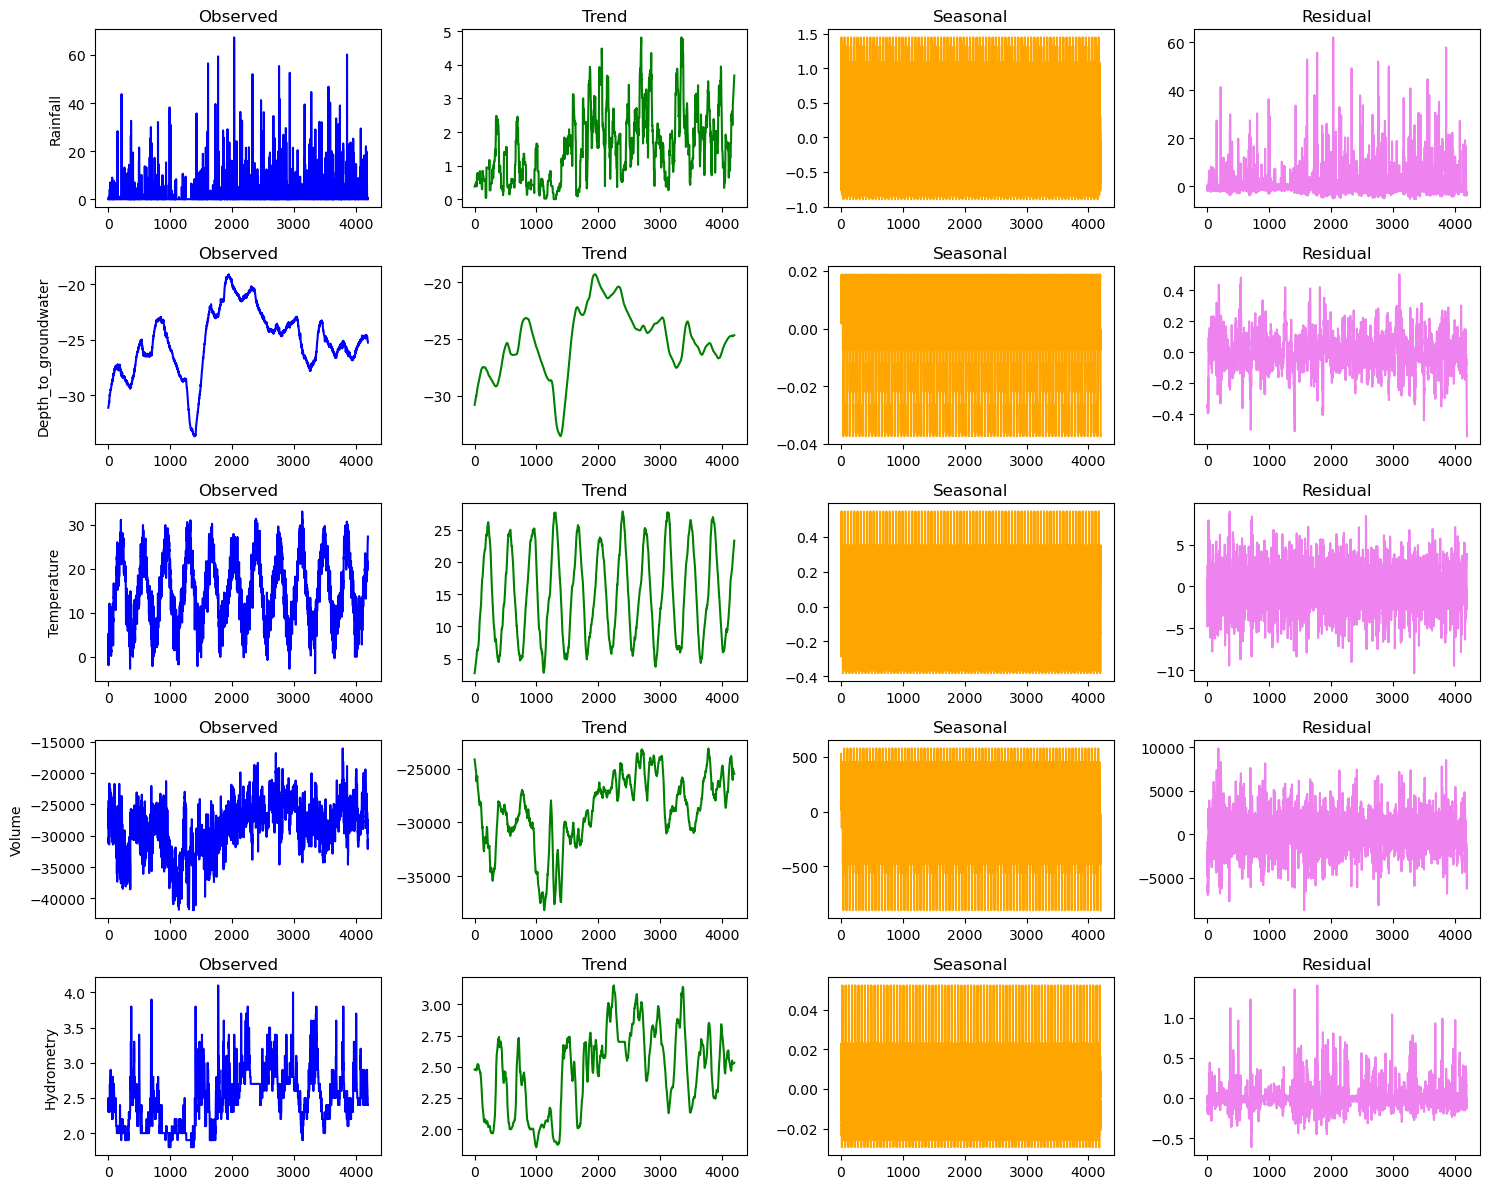

In [135]:
fig, axs = plt.subplots(nrows=len(data.drop(columns='Date').columns), ncols=4, figsize=(15, 12))


def plot_seasonal_decomposition(col, i):
    result = seasonal_decompose(data[col], period=52, model='additive', extrapolate_trend='freq')
    
    
    # Plot Observed component
    result.observed.plot(ax=axs[i, 0], color='blue')
    axs[i, 0].set_title('Observed')
    axs[i, 0].set_ylabel(col)
    
    # Plot Trend component
    result.trend.plot(ax=axs[i, 1], color='green')
    axs[i, 1].set_title('Trend')
    
    # Plot Seasonal component
    result.seasonal.plot(ax=axs[i, 2], color='orange')
    axs[i, 2].set_title('Seasonal')
    
    # Plot Residual component
    result.resid.plot(ax=axs[i, 3], color='violet')
    axs[i, 3].set_title('Residual')

# Loop through each column (except 'Date') and apply the decomposition and plotting
for i, col in enumerate(data.drop(columns='Date').columns):
    plot_seasonal_decomposition(col, i)

plt.tight_layout()
plt.show()


In [139]:
core_columns = data.drop(columns='Date').columns

In [140]:
core_columns

Index(['Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume',
       'Hydrometry'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

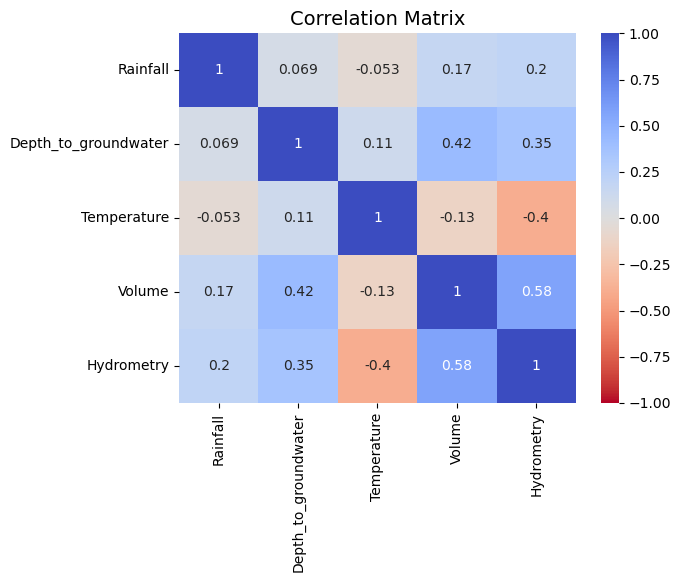

In [141]:
corr_matrix = data[core_columns].corr()

sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm_r')
plt.title('Correlation Matrix', fontsize = 14)

Autocorrelation Analysis

Autocorrelation is the correlation between two observations at different points in a time series. Autocorrelation(ACF) 
and Partial Autocorrelation(PACF) are statistical tools used in time series analysis to understand and analyze the patterns and dependencies within a time series dataset.
They help in identifying the presence of serial correlation, which is the correlation between a time series and its lagged versions (previous time points).

Autocorrelation Function (ACF):
Definition: ACF measures the correlation between a time series and its lagged values at different time intervals.

Purpose: It helps to identify the underlying patterns or trends in the time series. 
A strong autocorrelation at a particular lag indicates that the current value of the time series depends on its past values up to that lag.

Interpretation: If ACF at lag 1 is high, it suggests a strong linear relationship between the current value and the previous value.

If ACF shows periodicity (e.g., every 12 lags), it might indicate a seasonal pattern in the data.

If ACF drops off quickly after a few lags, it suggests that most of the information in the series is contained within those lags.


Partial Autocorrelation Function (PACF):
Definition: PACF measures the correlation between a time series and its lagged values after removing the linear dependence of the series on the intervening lags.

Purpose: PACF helps in identifying the order of an autoregressive (AR) model. An AR model represents the current value as a linear combination of its past values. PACF helps to identify the number of past values that directly influence the current value, effectively showing the "pure" correlation.

Interpretation: A significant PACF value at lag k indicates that there's a direct relationship between the current value and the value k time units ago.

Non-significant PACF values at lags beyond the identified order suggest that those lags do not contribute significantly to predicting the current value.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

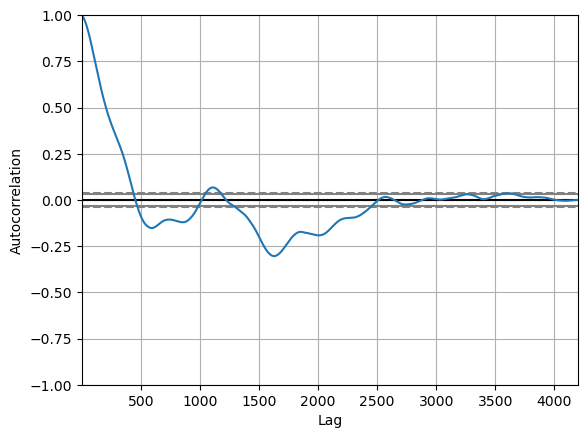

In [142]:
# Using pandas
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['Depth_to_groundwater'])

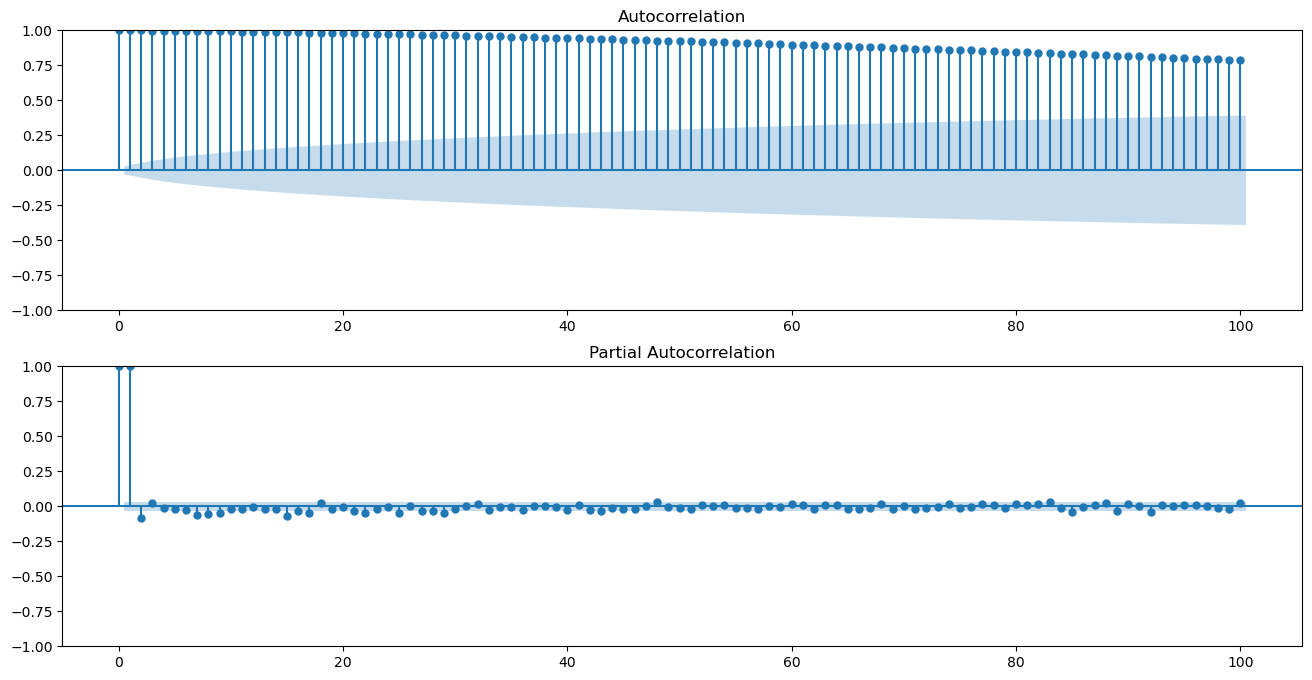

In [143]:
# Using statmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16,8))

plot_acf(data['Depth_to_groundwater'], lags = 100, ax = ax[0])
plot_pacf(data['Depth_to_groundwater'], lags = 100, ax = ax[1])

plt.show()

In [144]:
features = ['Rainfall', 'Temperature', 'Volume', 'Hydrometry']
target = ['Depth_to_groundwater']

train_size = int(0.85 * len(data)) 

multivariate_data = data[['Date'] + target + features].copy()
multivariate_data.columns = ['ds', 'y'] + features
# Columns named ds i.e. Date and y i.e. Target
# Forecasting models themselves identify ds, y as date and Target value respectively from data.

train = multivariate_data.iloc[:train_size, :]

# Splitting data into training and validation dataset
X_train = pd.DataFrame(multivariate_data.iloc[:train_size, [0, 2, 3, 4, 5]])
Y_train = pd.DataFrame(multivariate_data.iloc[:train_size, 1])

X_valid = pd.DataFrame(multivariate_data.iloc[train_size: , [0, 2, 3, 4, 5]])
Y_valid = pd.DataFrame(multivariate_data.iloc[train_size: , 1])

train.head()

,ds,y,Rainfall,Temperature,Volume,Hydrometry
0,2009-01-01,-31.14,0.0,5.2,-24530.688,2.4
1,2009-02-01,-31.11,0.0,2.3,-28785.888,2.5
2,2009-03-01,-31.07,0.0,4.4,-25766.208,2.4
3,2009-04-01,-31.05,0.0,0.8,-27919.296,2.4
4,2009-05-01,-31.01,0.0,-1.9,-29854.656,2.3


In [147]:
!pip install prophet

     ---------------------------------------- 13.3/13.3 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 4.0 MB/s eta 0:00:00


In [148]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore

# Training model
model = Prophet()
for col in features:
    model.add_regressor(col)
    
# Fit model
model.fit(train)

# Predict on validation set
y_pred = model.predict(X_valid)

# Calculate error
mae = mean_absolute_error(Y_valid, y_pred['yhat'])
rmse = np.sqrt(mean_squared_error(Y_valid, y_pred['yhat']))

print(Fore.GREEN + f'MAE: {mae}')
print(Fore.BLUE + f'RMSE: {rmse}')

13:16:14 - cmdstanpy - INFO - Chain [1] start processing
13:16:16 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.6407766144572884
RMSE: 0.8164262106026834


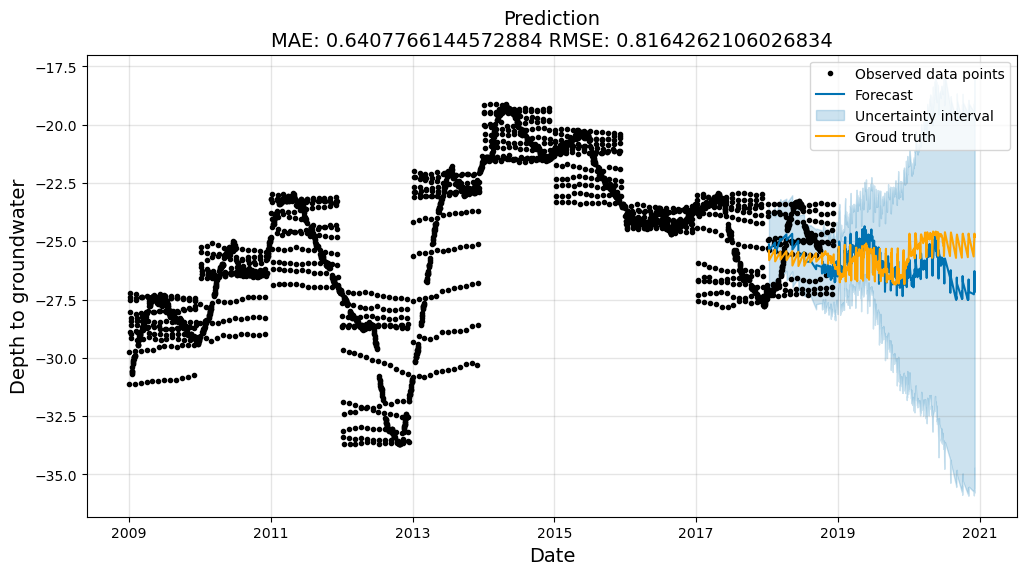

In [149]:
fig, ax = plt.subplots(1, figsize = (12, 6))

model.plot(y_pred, ax = ax)
sns.lineplot(x = X_valid['ds'], y = Y_valid['y'], ax = ax, color = 'orange', label = 'Groud truth')

ax.set_title(f'Prediction\nMAE: {mae} RMSE: {rmse}', fontsize = 14)
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('Depth to groundwater', fontsize = 14)

plt.show()